# **Μάθημα 5: Πρωτόκολλα Επικοινωνίας I2C, SPI**

**Ημερομηνία:** 15/3/2025

## Στόχοι
- Eπικοινωνία I2C, SPI
- Διαχείριση μετάδοσης δεδομένων και χρήση βιβλιοθηκών για επικοινωνία I2C, SPI


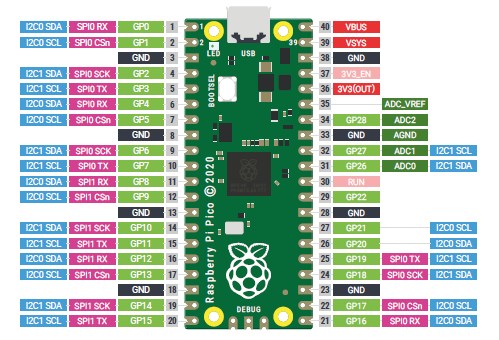

# Πρωτόκολλo Επικοινωνίας I2C

Ένα RP Pico 2040 διαθέτει  2 × I2C, 2 × SPI και 2 × UART κανάλια επικοινωνίας.

Η επικοινωνία μέσω I2C γίνεται μέσω δύο καλωδίων: ενός ρολογιού (συνήθως σημειώνεται ως SCL) και ενός καναλιού δεδομένων (συνήθως σημειώνεται ως SDA).

Αυτά πρέπει να συνδεθούν σε συγκεκριμένα pins στο Pico. Υπάρχουν διάφορες επιλογές, δείτε το διάγραμμα σύνδεσης για τις διαθέσιμες επιλογές – οι λειτουργίες I2C εμφανίζονται με ανοιχτό μπλε χρώμα ενώ  για το SPI οι λειτουργίες εμφανίζονται με ροζ χρώμα.

Υπάρχουν δύο δίαυλοι I2C (I2C0 και I2C1), και μπορείτε να χρησιμοποιήσετε είτε τον ένα είτε και τους δύο.

Στο παράδειγμά μας, θα χρησιμοποιήσουμε το I2C0 – με το GP0 για το SDA, και το GP1 για το SCL.

## Πως Λειτουργεί η Επικοινωνία I2C;
Η διασύνδεση κυκλωμάτων (Inter-Integrated Circuit - I2C) είναι ένα πρωτόκολλο επικοινωνίας που χρησιμοποιείται συνήθως για τη σύνδεση συσκευών χαμηλής ταχύτητας, όπως αισθητήρες, μικροελεγκτές και περιφερειακές συσκευές, σε έναν κεντρικό ελεγκτή ή master. 



Ακολουθεί μια επισκόπηση του τρόπου λειτουργίας του:

### Βασικά Στοιχεία I2C
1. Επικοινωνία Master-Slave:

- Το I2C χρησιμοποιεί μία master συσκευή (π.χ. μικροελεγκτή) για να ελέγξει μία ή περισσότερες slave συσκευές (π.χ. αισθητήρες).

- Ο master ξεκινάει κάθε επικοινωνία, ενώ οι slave συσκευές ανταποκρίνονται μόνο όταν τους απευθύνεται.

2. Δύο καλώδια:

- SDA (Serial Data Line): Μεταφέρει δεδομένα μεταξύ συσκευών.

- SCL (Serial Clock Line): Παρέχει το σήμα ρολογιού για τον συγχρονισμό της μετάδοσης δεδομένων.

3. Διευθυνσιοδότηση (Addressing):

- Κάθε slave συσκευή στο bus I2C έχει μια μοναδική διεύθυνση. Αυτό επιτρέπει στον master να προσδιορίσει τη συσκευή με την οποία θέλει να επικοινωνήσει.

4. Αμφίδρομη επικοινωνία (Bidirectional Communication):

- Τα δεδομένα μπορούν να ρέουν και προς τις δύο κατευθύνσεις στη γραμμή SDA, επιτρέποντας στον master να στέλνει εντολές και να διαβάζει δεδομένα από τις slave συσκευές.

### Διαδικασία Επικοινωνίας
- Συνθήκη Έναρξης (Start Condition): Ο master ξεκινά την επικοινωνία τραβώντας τη γραμμή SDA χαμηλά ενώ κρατά τη γραμμή SCL υψηλή. Αυτό σηματοδοτεί σε όλες τις slave συσκευές να ετοιμαστούν.

- Διευθυνσιοδότηση (Addressing): Ο master στέλνει τη διεύθυνση 7-bit ή 10-bit της στόχευσης συσκευής, ακολουθούμενη από ένα bit ανάγνωσης/εγγραφής που υποδεικνύει την κατεύθυνση της λειτουργίας.

- Επιβεβαίωση (Acknowledgment): Η στοχευμένη slave συσκευή επιβεβαιώνει τραβώντας τη γραμμή SDA χαμηλά κατά τη διάρκεια του παλμού επιβεβαίωσης.

- Μεταφορά Δεδομένων (Data Transfer): Ο master και το slave ανταλλάσσουν δεδομένα σε κομμάτια των 8-bit. Κάθε byte ακολουθείται από ένα bit επιβεβαίωσης.

- Συνθήκη Τερματισμού (Stop Condition): Ο master τερματίζει την επικοινωνία απελευθερώνοντας τόσο τη γραμμή SDA όσο και τη γραμμή SCL (επιστρέφοντάς τις σε υψηλή κατάσταση).

### Πλεονεκτήματα του I2C
- Απαιτεί μόνο δύο καλώδια, ανεξάρτητα από τον αριθμό των συσκευών.

- Επιτρέπει τη σύνδεση πολλαπλών συσκευών στο ίδιο bus.

- Απλό και αποδοτικό για επικοινωνία σε μικρές αποστάσεις.


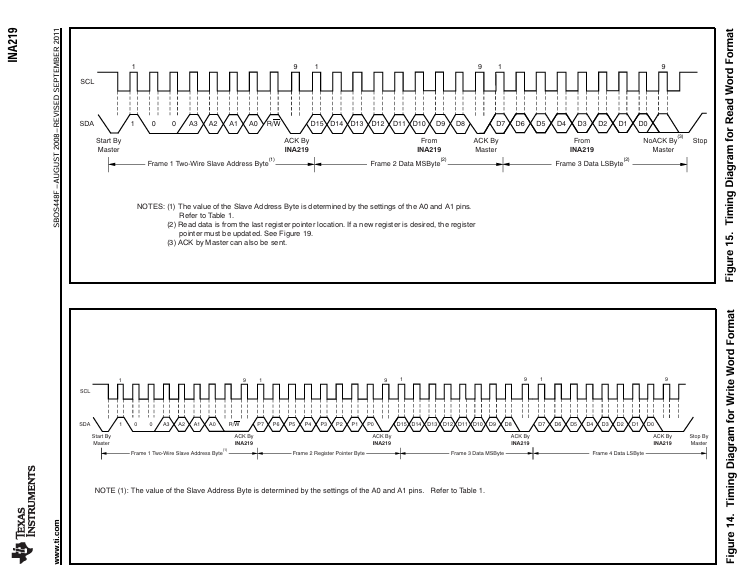

Διαγράμματα χρονισμού για εντολές Read (επάνω) και Write για το αισθητήριο INA219 της Texas Instruments.

### Παράδειγμα σε Python
Ακολουθεί βασικό παράδειγμα χρήσης I2C σε MicroPython με συσκευή I2C device, όπως ένα αισθητήριο θερμοκρασίας:

In [1]:
from machine import Pin, I2C
import time

# Initialize I2C - Using I2C0 with SDA on Pin 0 and SCL on Pin 1
i2c = I2C(0, scl=Pin(1), sda=Pin(0), freq=400000)

# Scan for devices on the I2C bus
devices = i2c.scan()

if devices:
    print("I2C devices found:", devices)
else:
    print("No I2C devices found")

# Example: Communicating with a device at address 0x48
device_address = 0x48

# Write data to the device (e.g., a register or configuration)
i2c.writeto(device_address, bytes([0x01, 0x80]))

# Read data from the device (e.g., a measurement)
data = i2c.readfrom(device_address, 2)  # Read 2 bytes
print("Data read:", data)

# Optionally, convert the read data into a meaningful value
value = int.from_bytes(data, 'big')
print("Processed Value:", value)


No serial connected
  %serialconnect to connect
  %esptool to flash the device
  %lsmagic to list commands

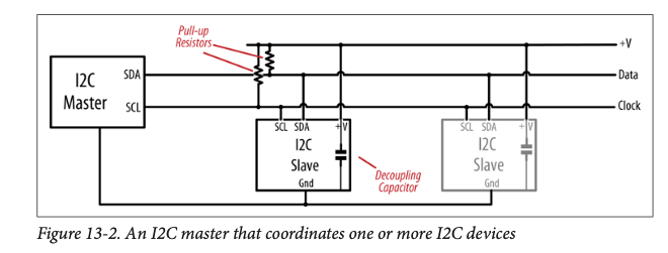

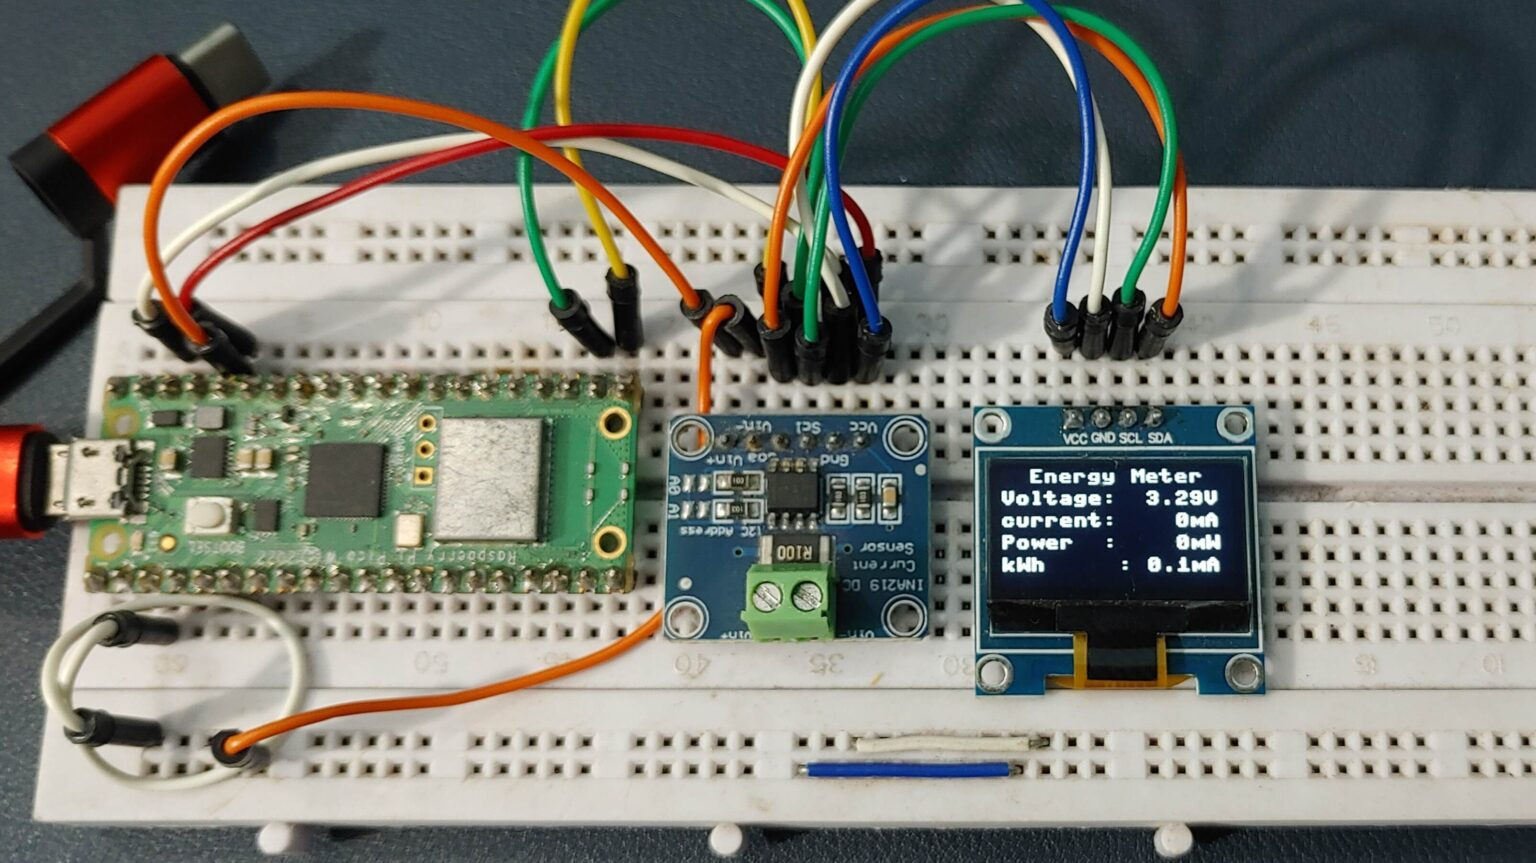

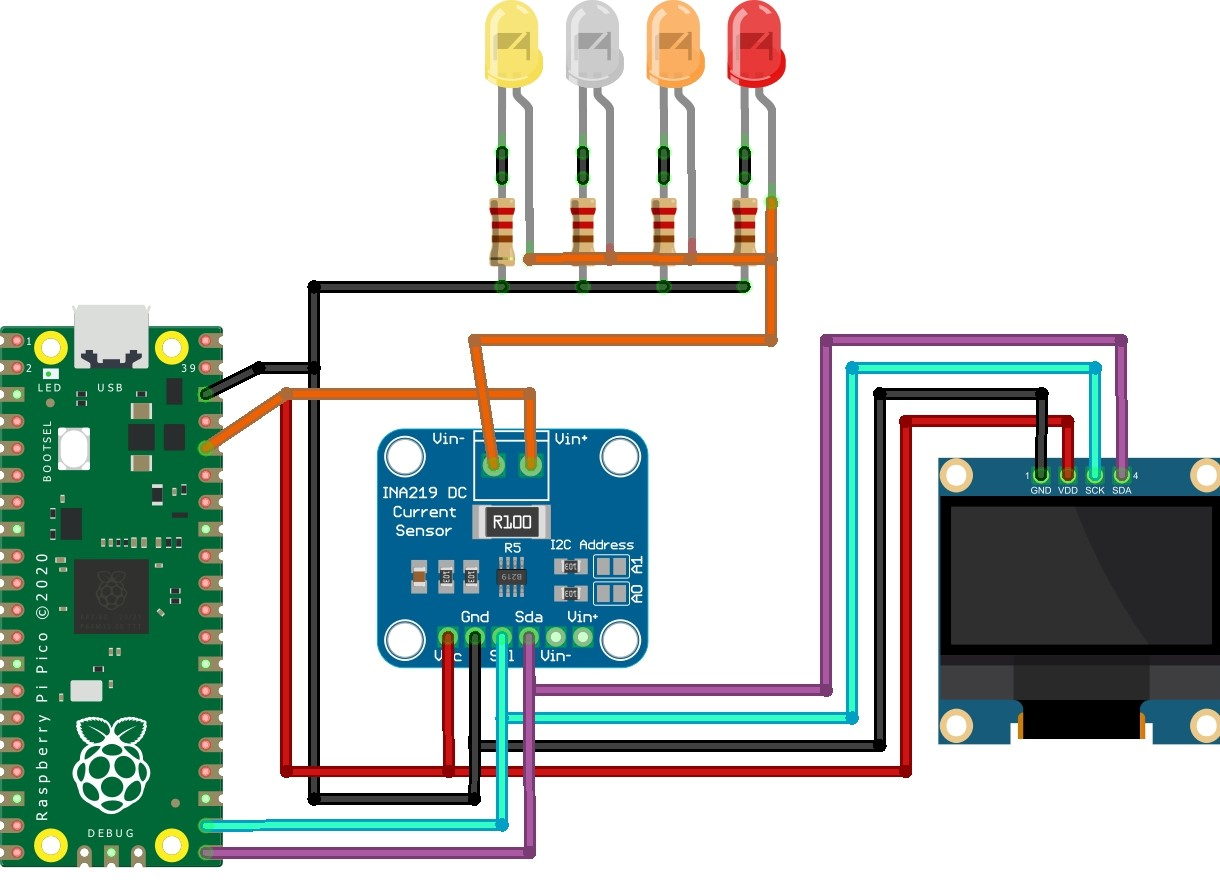

## Παράδειγμα με ΙΝΑ219 και σύνδεση I2C
[Bασική σύνδεση και πληροφορίες για IN219](INA219.ipynb).

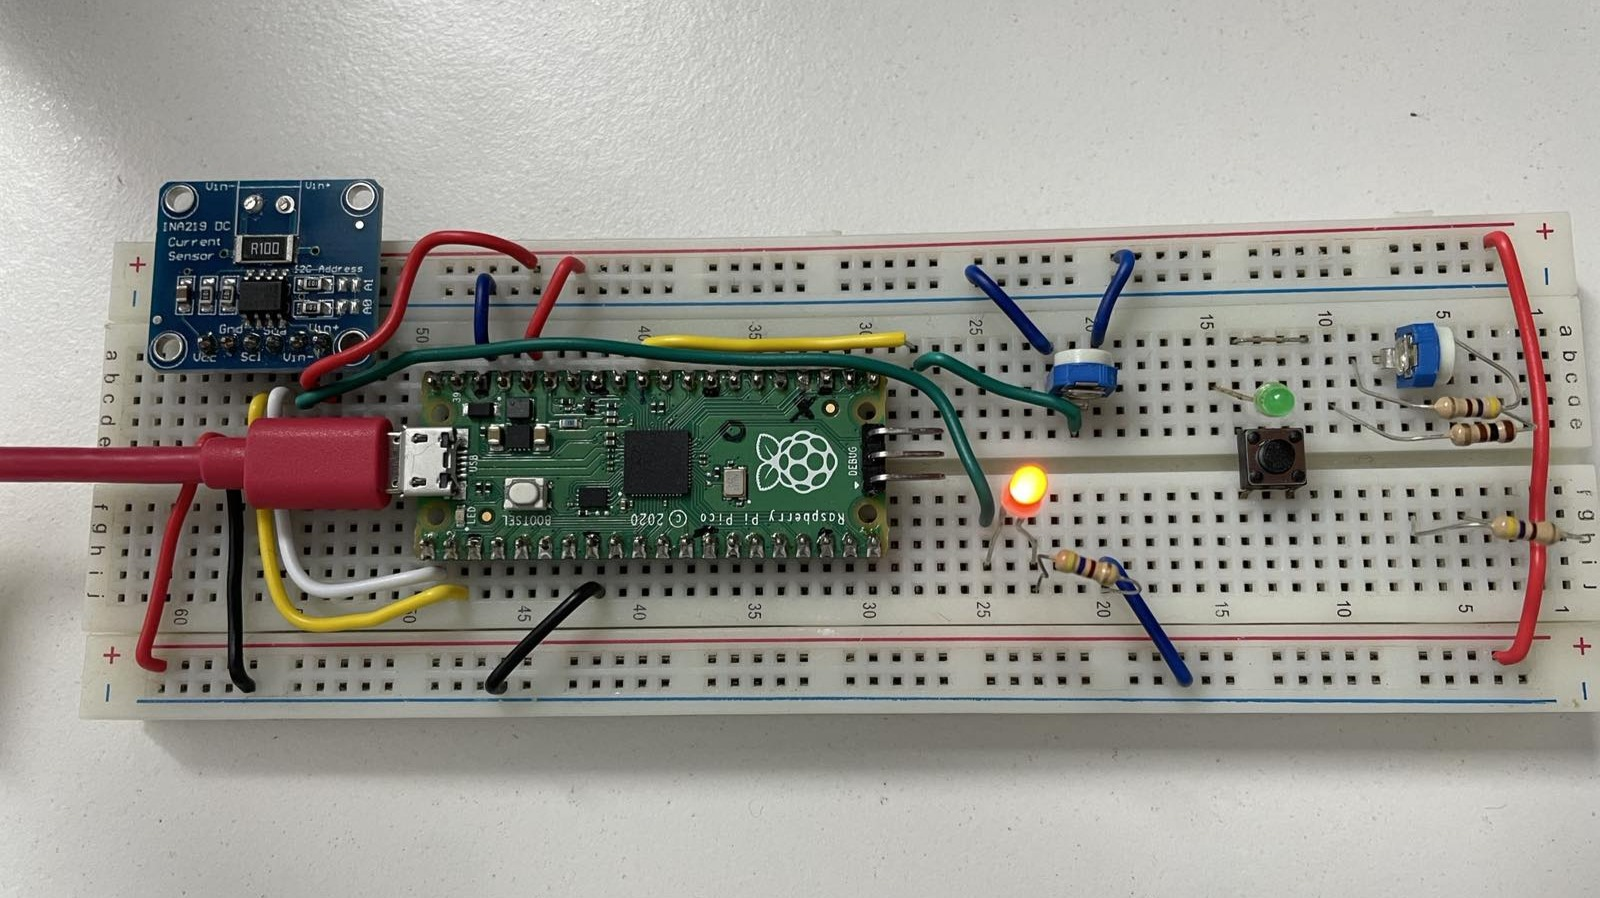

### Σύνδέσεις I2C-Pico:  sda=Pin(GP0), scl=Pin(GP1), Vcc=3.3V(3V3OUT), GND=GND, Vin+=3.3V, Vin-=Led(+) 

In [33]:
%serialconnect

Connecting to --port=COM9 --baud=115200 
Ready.


In [37]:
from machine import I2C, Pin
import time
# G. Papalambrou, 2025

# INA219 default I2C address
INA219_ADDR = 0x40

# Register addresses
REG_SHUNT_VOLTAGE = 0x01  # Shunt voltage register
REG_BUS_VOLTAGE = 0x02    # Bus voltage register

# Shunt resistor value (in ohms)
SHUNT_RESISTOR = 0.1  # Replace with your shunt resistor value (e.g., 0.1 ohms)


In [35]:
# Initialize I2C, working in my PICO !!!!!
i2c = I2C(0, sda=Pin(0), scl=Pin(1), freq=400000)

# Function to read shunt voltage
def read_shunt_voltage():
    data = i2c.readfrom_mem(INA219_ADDR, REG_SHUNT_VOLTAGE, 2)
    # Convert to signed 16-bit integer manually
    raw_value = (data[0] << 8) | data[1]
    if raw_value & 0x8000:  # Check if the number is negative
        raw_value -= 0x10000
    shunt_voltage = raw_value * 0.01  # Convert to mV (10 μV/bit)
    return shunt_voltage

# Function to read current
def read_current():
    shunt_voltage = read_shunt_voltage()  # Get shunt voltage in mV
    current = shunt_voltage / SHUNT_RESISTOR  # Calculate current (I = V/R)
    return current  # Current in mA

# Function to read bus voltage
def read_bus_voltage():
    data = i2c.readfrom_mem(INA219_ADDR, REG_BUS_VOLTAGE, 2)
    bus_voltage = (data[0] << 8 | data[1]) >> 3  # Convert to raw voltage
    return bus_voltage * 4 / 1000  # Convert to volts (4 mV/bit)

In [36]:
while True:
    # Read and print measurements
    bus_voltage = read_bus_voltage()
    shunt_voltage = read_shunt_voltage()
    current = read_current()

    print("Bus Voltage: {:.2f} V".format(bus_voltage))
    print("Shunt Voltage: {:.2f} mV".format(shunt_voltage))
    print("Current: {:.2f} mA".format(current))
    time.sleep(1)
    print("--------")


Bus Voltage: 3.10 V
Shunt Voltage: 0.30 mV
Current: 3.00 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.27 mV
Current: 2.70 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.30 mV
Current: 3.00 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.30 mV
Current: 3.00 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.31 mV
Current: 3.10 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.33 mV
Current: 3.30 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.32 mV
Current: 3.20 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.29 mV
Current: 2.90 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.33 mV
Current: 3.00 mA
--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.28 mV
Current: 2.80 mA
.--------
Bus Voltage: 3.10 V
Shunt Voltage: 0.31 mV
Current: 3.10 mA


*** Sending Ctrl-C



Traceback (most recent call last):
  File "<stdin>", line 10, in <module>
KeyboardInterrupt: 
